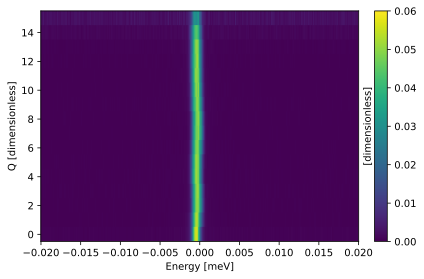

In [1]:
import scipp as sc
import numpy as np
import matplotlib.pyplot as plt

number_of_Q_points=16

# EnergyValues=np.zeros((number_of_Q_points,1024))
IntensityValues=np.zeros((number_of_Q_points,1024))
ErrorValues=np.zeros((number_of_Q_points,1024))

for Q in range(16):
    filename = '../../IN16b_GGG_data/vanadium_Q' +str(Q+1) +'.dat'

    data_array = np.loadtxt(filename)
    EnergyValues=data_array[:, 0] #should be the same for all Q
    # EnergyValues[Q,:]=data_array[:, 0]
    IntensityValues[Q,:]=data_array[:,1]
    ErrorValues[Q,:]=data_array[:,2]

Energy=sc.array(dims=['Energy'],values=EnergyValues/1000,unit='meV')
Q=sc.array(dims=['Q'],values=range(number_of_Q_points))

Intensity=sc.array(dims=['Q','Energy'],values=IntensityValues,variances=ErrorValues*ErrorValues) #The variance is the square of the uncertainty!

VanadiumData = sc.DataArray(data=Intensity, coords={'Q':Q,'Energy': Energy})


IntensityMin=0.0
IntensityMax=0.06

start = -0.02 * sc.Unit('meV')
stop = 0.02 * sc.Unit('meV')
sc.plot(VanadiumData['Energy',start:stop],vmin=IntensityMin,vmax=IntensityMax)


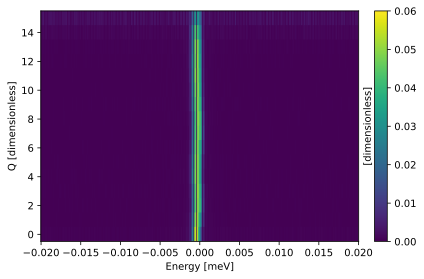

In [2]:
IntensityMin=0.0
IntensityMax=0.06
histogrammedVanadiumData = VanadiumData.hist(Energy=sc.scalar(1e-3*0.05, unit='meV')) #bin size of 0.1 mueV
sc.plot(histogrammedVanadiumData['Energy',start:stop],vmin=IntensityMin,vmax=IntensityMax)

